# Title : Broken Eggs Recognition Image Dataset

## About Dataset

Here we have an image bank of eggs divided into 3 classes (Broken, Empty or Good), we have 569 images divided between Training and Test, here in this study we will analyze the images and perform all the training of the neural network using CNN to perform the classification of these images.

### Importing Libraries

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout 

import os
import warnings
warnings.filterwarnings("ignore")


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Load Dataset

In [16]:
train_dir = r"C:\Users\ASUS\Downloads\train"
test_dir = r"C:\Users\ASUS\Downloads\test"


*Defines two variables train_dir and test_dir which contain the file paths of the training and testing datasets, respectively. 


In [38]:

img_width,img_height=200,200


*For all images in one size.


In [54]:
#batch_size=4
batch_size=8

In [55]:

train_dataset = ImageDataGenerator(
    rescale = 1. /255,            
    rotation_range = 20,          
    width_shift_range = 0.2,      
    height_shift_range = 0.2,
    shear_range = 0.2,            
    zoom_range = 0.2,             
    horizontal_flip = True
    
    )


*ImageDataGenerator(rescale=1./255): Here, an ImageDataGenerator object is created. This object will be used to 
augment the image data during training and validation. The rescale=1./255 argument scales the pixel values of the 
images between 0 and 1, which is a common practice for neural networks that use image data.

In [56]:

test_dataset = ImageDataGenerator(rescale = 1. /255) 

### Data Preprocessing

In [57]:

X_train = train_dataset.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),# number of pixel
    batch_size=batch_size,
    class_mode="categorical"
)


Found 542 images belonging to 3 classes.


This train_dataset is created using train_dataset.flow_from_directory() to flow image data from the train Dataset.It takes     the file paths ('Filepath')

target_size: The size to which all the images will be resized during the loading process.

batch_size: The number of samples in each batch.

class_mode: the labels are represented in a categorical format (class_mode='categorical').

In [58]:

len(X_train)


68

In [59]:

X_test = test_dataset.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical"
)


Found 32 images belonging to 3 classes.


This  is similar to X_train but is created for the validation data.

In [60]:

model = Sequential([
    Conv2D(32, (3,3), activation="relu",input_shape = (img_width, img_height, 3)),  
    MaxPool2D((2,2)),

    Conv2D(64, (3,3),activation="relu"),  # 3x3 ka 1 filter  #img shape=(512, 512, 3=color channel)
    MaxPool2D((2,2)),
    
    Dropout(0.5),
    Conv2D(128,(3,3), activation="relu"),
    MaxPool2D((2,2)),
    
    Conv2D(128,(3,3), activation="relu"),
    MaxPool2D((2,2)),
    
    Flatten(),   # convert in 1D
    Dense(512, activation="relu"),#hidden
    Dense(256, activation="relu"),#h
    Dense(3, activation="softmax") #output
    
])

Defines a simple Convolutional Neural Network (CNN) model using the tensorflow.Keras.model import Sequential.

It uses convolutional and pooling layers to extract features from the input image, followed by fully connected layers for
classification. The dropout layer helps prevent overfitting during training. The softmax activation in the output layer 
provides probabilities for each class.

Conv2D is the first convolutional layer with 32 filters, each of size (3,3), using the ReLU activation function.
The input_shape parameter defines the shape of your input data, which is assumed to be an image with img_width, 
img_height, and 3 color channels (RGB).    
    
MaxPool2D layer performs max pooling with a pool size of (2,2). It reduces the dimensions (width and height) of the
input by taking the maximum value in a 2x2 window.

Flatten layer flattens the output of the previous layer into a one-dimensional vector. It prepares the data for the fully 
connected layers.

Two hidden dense layers with 512 and 256 neurons, respectively, and ReLU activation functions. These layers are fully connected.

The output layer with 3 neurons (we have classification task with 3 classes) and softmax activation. 

In [61]:

model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])


The optimizer is the algorithm used to update the weights of the neural network in order to minimize the loss function. 

loss='categorical_crossentropy': The categorical cross-entropy loss is commonly used for multi-class classification problems.


Metrics are used to evaluate the performance of the model during training and testing. 

In [62]:
history = model.fit(X_train,
                    validation_data=X_test,
                    steps_per_epoch=len(X_train),
                    validation_steps=len(X_test),
                    verbose=1,
                    epochs=10)

Epoch 1/10
68/68 [==============================] - 19s 202ms/step - loss: 1.1468 - accuracy: 0.3967 - val_loss: 0.8481 - val_accuracy: 0.5625
Epoch 2/10
68/68 [==============================] - 13s 185ms/step - loss: 0.7136 - accuracy: 0.6642 - val_loss: 0.6651 - val_accuracy: 0.6250
Epoch 3/10
68/68 [==============================] - 13s 188ms/step - loss: 0.5047 - accuracy: 0.6790 - val_loss: 0.4582 - val_accuracy: 0.8125
Epoch 4/10
68/68 [==============================] - 13s 188ms/step - loss: 0.4595 - accuracy: 0.7066 - val_loss: 0.4631 - val_accuracy: 0.7188
Epoch 5/10
68/68 [==============================] - 13s 192ms/step - loss: 0.4613 - accuracy: 0.7177 - val_loss: 0.4967 - val_accuracy: 0.6250
Epoch 6/10
68/68 [==============================] - 13s 197ms/step - loss: 0.4548 - accuracy: 0.7269 - val_loss: 0.3917 - val_accuracy: 0.8438
Epoch 7/10
68/68 [==============================] - 14s 200ms/step - loss: 0.4563 - accuracy: 0.7214 - val_loss: 0.4457 - val_accuracy: 0.7812

#### Compile and train the defined model.

model.fit() :The model.fit() function in Keras is used to train the neural network model.

X_train :This is the input training data that you'll use to train your model.

epochs: The number of training epochs, i.e., the number of times the model will iterate over the entire training dataset.

The validation_data parameter allows you to provide a separate dataset (here, X_test) for evaluating the model's performance during training.

# Visualization

In [66]:
import matplotlib.pyplot as plt

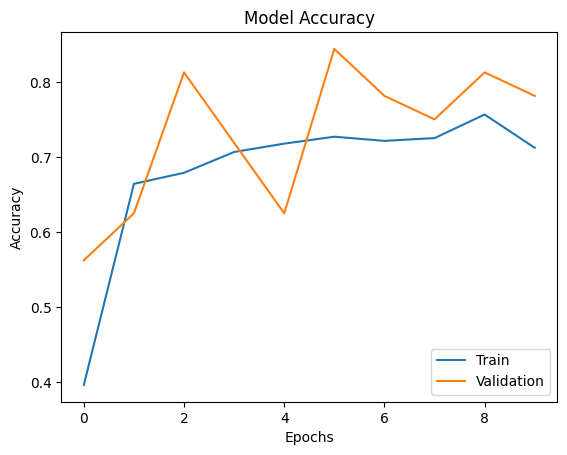

In [64]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"])
plt.show()

#### Visualize the model accuracy at training and validation time.

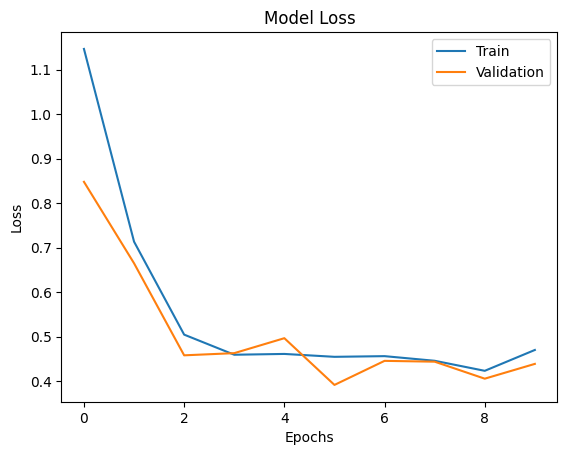

In [65]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Validation"])
plt.show()

#### Visualize the model loss at training and validation time.

In [67]:
class_labels = X_train.class_indices

The class_indices attribute contains a dictionary that maps class names to their corresponding indices.

In [68]:
class_names = {value: key for key, value in class_labels.items()}

print("Class Names:", class_names)

Class Names: {0: 'Crack', 1: 'Empty', 2: 'Good'}


class_labels.items(): This method returns a view of the dictionary's key-value pairs. {value: key for key, value in class_labels.items()}: This is a dictionary comprehension. It iterates over each key-value pair in class_labels

In [69]:
from tensorflow.keras.preprocessing import image

In [87]:
#img_path=r"C:\Users\ASUS\Downloads\Crack egg.jpg"
#img_path = r"C:\Users\ASUS\Downloads\Good_egg.jpg"
img_path = r"C:\Users\ASUS\Downloads\test\Good\2023-04-09 20_18_34.437531.jpg"

We are using a random image from dataset to identify its class.

In [88]:
img = image.load_img(img_path, target_size = (img_width,img_height))

This function loads an image from the specified file path (img_path) and resizes it to the specified target size.

In [89]:
img_arr = image.img_to_array(img)

This function converts a image into a NumPy array.

In [90]:
img_arr = np.expand_dims(img_arr, axis=0)

The np.expand_dims function is used to add a new dimension to the array. It takes the array (img_arr) and adds a new dimension along the specified axis.

In [91]:
img_arr = img_arr / 255.0

It is normalizing the pixel values in the NumPy array img_arr. This process scales the original pixel values, which typically range from 0 to 255, to a standardized range between 0 and 1.

In [92]:
pred = model.predict(img_arr)

1/1 [==============================] - 0s 55ms/step


This method is used to obtain predictions from a trained neural network model. It takes input data and produces predictions based on the learned patterns.

In [93]:
pred_class = np.argmax(pred)

argmax helps to identify the index of the class with the highest predicted probability, allowing you to determine the predicted class label.

In [94]:
class_names[pred_class]

'Good'

So, it predicts True.

Testing our model on the set of test images we obtained 78.12% accuracy, a good result, when we analyze the classes
we can see that we had 100% success in  "Crack" and "Good" eggs and we missed some of the "Empty"and some "Crack" class.